# Projektaufgabe: Deskriptive Statistik und Visualisierungen:

## 1.) Leihen ältere Benutzer im Schnitt mehr Medien aus?

In [1]:
#Importieren der nötigen Module und der Daten:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# matplotlib inline
sns.set()

df = pd.read_csv("../data/Library_Usage.csv")

df_Checkouts = df[["Age Range", "Total Checkouts"]]


In [2]:
#Als erste schaue ich mir die Häufigkeitsverteilung der verschiedenen Altersgruppen an:
df_Checkouts["Age Range"].value_counts()

25 to 34 years       91083
35 to 44 years       67390
10 to 19 years       58944
45 to 54 years       52492
0 to 9 years         38242
65 to 74 years       30141
20 to 24 years       29761
55 to 59 years       21230
60 to 64 years       19800
75 years and over    14150
Name: Age Range, dtype: int64

Bei dem Merkmal der Altergruppen handelt es sich um ordinale Werte. Für die Fragestellung hilft uns das allerdings, da man so die älteren Altergruppen gut mit den jüngeren vergleichen kann. Ich verstehe die Frage so, dass nach dem generellen Ausleihverhalten gefragt wird. Darum nehme ich das Merkmal "Total Checkouts". Das Merkmal "Total Checkouts" ist ein metrischer Wert, von dem man den Durchschnitt errechnen kann.

Die meisten Benutzer sind zwischen 25 und 44 Jahre. Aber leihen sie auch am meisten aus?  

In [3]:
#Zuerst errechne ich den Mittelwert der Gesamtausleihen auf die Altersgruppen verteilt: 
df_Checkouts[["Age Range", "Total Checkouts"]].groupby(by="Age Range").mean()


,Total Checkouts
Age Range,
0 to 9 years,135.988390
10 to 19 years,236.651042
20 to 24 years,108.856692
25 to 34 years,50.472415
35 to 44 years,110.665351
45 to 54 years,193.190848
55 to 59 years,242.424258
60 to 64 years,271.689646
65 to 74 years,294.584519


In [4]:
#Ich weiss von vorherigen Berrechnungen, dass die Streuung der Total Checkouts hoch ist. 
#Darum berrechne ich auch den Median:
df_Checkouts[["Age Range", "Total Checkouts"]].groupby(by="Age Range").median()

,Total Checkouts
Age Range,
0 to 9 years,30.0
10 to 19 years,49.0
20 to 24 years,6.0
25 to 34 years,6.0
35 to 44 years,18.0
45 to 54 years,30.0
55 to 59 years,30.0
60 to 64 years,34.0
65 to 74 years,42.0


In [5]:
# Zur besseren Darstellung möchte ich die Ausreißerwerte, die über der 0.90ten Quantile liegen herausnehmen.
#Von der Aufgabenstellung interessieren die Mittelwerte:
df['Total Checkouts'].quantile((0.9, 0.95, 0.99))

0.90     424.0
0.95     816.0
0.99    2118.0
Name: Total Checkouts, dtype: float64

<AxesSubplot:xlabel='Total Checkouts', ylabel='Age Range'>

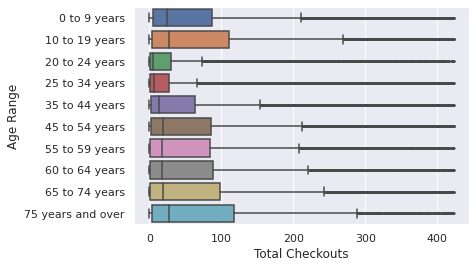

In [6]:
sort =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']
sns.boxplot(x="Total Checkouts", y="Age Range", data=df_Checkouts[df_Checkouts["Total Checkouts"]<424], order=sort, fliersize=1, whis=1.5)

Aus den Berechnungen läßt sich erkennen, dass nur die Gruppe der 75-jährigen und älteren Nutzer im Schnitt etwas mehr Ausleihen tätigen als die anderen Gruppen. Aber nicht wirklich viel. Besonders der Unterschied zu den Kindern ist minimal. Der Graph ist bimodal mit Gipfeln einmal bei den 10 - 19-jährigen und dann den 75-jährigen und älteren Nutzern. Was ins Auge fällt ist, dass die Nutzeraltersgruppe von 20 bis 34 Jahren deutlich am wenigsten ausleiht. 

## 2.) Wie viele Nutzer möchten schriftlich informiert werden? Wie alt sind die Nutzer, die per Telefon informiert werden möchten?

Dazu schaue ich mir das Merkmal "Notice Preference Definition" an. Die "Notice Preference Defintion" ist ein nominales Merkmal. Es lassen sich die Häufigkeiten berechnen. 

In [62]:
#Wie möchten Benutzer gerne kontaktiert werden (Absolute Häufigkeit):
df["Notice Preference Definition"].value_counts()

email    323937
phone     68172
print     31336
none          3
Name: Notice Preference Definition, dtype: int64

In [54]:
#Relative Häufigkeit:
df["Notice Preference Definition"].value_counts(normalize=True)

email    0.764998
phone    0.160993
print    0.074002
none     0.000007
Name: Notice Preference Definition, dtype: float64

In [57]:
schriftlich=df.loc[(df['Notice Preference Definition'] == "email")|(df['Notice Preference Definition'] == "print")]
len(schriftlich)

355273

In [60]:
print(str(len(schriftlich)) + " Benutzer möchten schriftlich benachrichtigt werden. Davon 323937 per E-mail und 31336 per Post.")

355273 Benutzer möchten schriftlich benachrichtigt werden. Davon 323937 per E-mail und 31336 per Post.


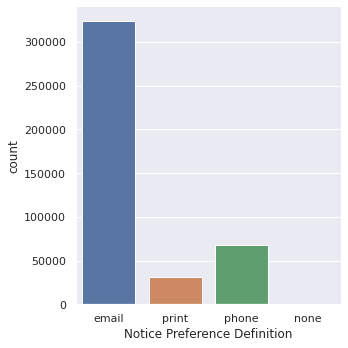

In [66]:

sns.catplot(x="Notice Preference Definition",
            data=df, kind="count")

## Wie alt sind die Nutzer, die per Telefon informiert werden möchten?

Hier muss ich das ordinale Merkmal "Age Range" mit dem nominalen Merkmal "Notice Preference Definition" vergleichen. Dazu beutze ich eine Kreuztabelle. Da wir keine genauen Altersangaben haben, können nur die jeweiligen Altersgruppen miteinader verglichen werden. Ein Durchschnittsalterkann nicht bestimmt werden.

In [100]:
#Dazu erstelle ich eine Kreuztabelle, um die beiden Merkmale miteinander zu vergleichen:
pd.crosstab(
    df["Age Range"],
    df["Notice Preference Definition"],
    margins=True
)

Notice Preference Definition,email,none,phone,print,All
Age Range,,,,,
0 to 9 years,27475,2,6630,4135,38242
10 to 19 years,38055,0,15058,5831,58944
20 to 24 years,23809,1,3823,2128,29761
25 to 34 years,79351,0,7035,4697,91083
35 to 44 years,57698,0,6499,3193,67390
45 to 54 years,41450,0,7757,3285,52492
55 to 59 years,15328,0,4267,1635,21230
60 to 64 years,13805,0,4304,1691,19800
65 to 74 years,20299,0,7144,2698,30141


In [101]:
# Prozentuale Verteilung:
pd.crosstab(
    df["Notice Preference Definition"]=="phone",
    df["Age Range"],
    margins=True, normalize=0
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Notice Preference Definition,,,,,,,,,,
False,0.089024,0.123589,0.073045,0.236690,0.171477,0.125980,0.047770,0.043639,0.064763,0.024024
True,0.097305,0.220999,0.056108,0.103249,0.095383,0.113846,0.062625,0.063168,0.104849,0.082467
All,0.090357,0.139271,0.070318,0.215208,0.159227,0.124026,0.050161,0.046783,0.071216,0.033433


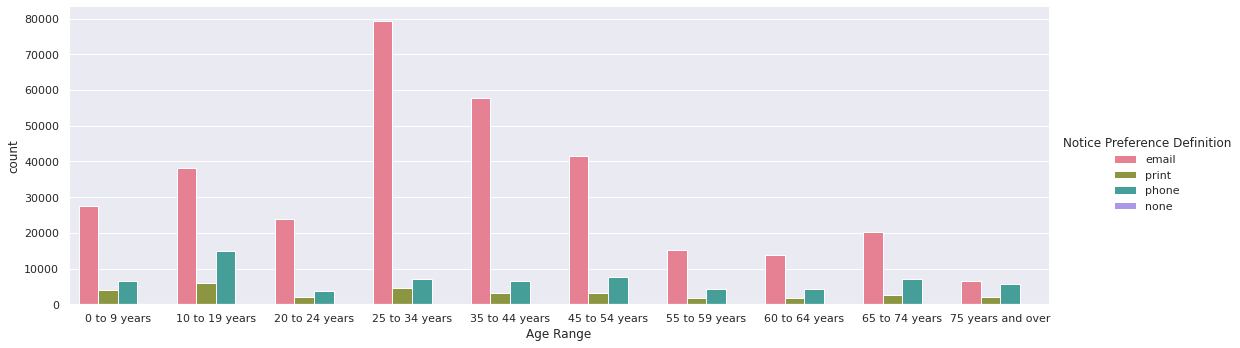

In [102]:
sns.catplot(x="Age Range", hue="Notice Preference Definition", 
            data=df, kind="count", palette=sns.color_palette("husl", 4), aspect=3, order=sort)

## Antwort:

Vor allem die Altersgruppe der 10 bis 19-jährigen möchte telefonisch benachrichtigt werden. Die Altersgruppen der Nutzer, die telefonisch benachrichtigt werden möchten, setzten sich wie folgt zusammen:

- 0 bis 9 = ca. 10%,
- 10 bis 19 = 22%,
- 20 bis 24 = ca. 6%,
- 25 bis 34 = ca. 10%,
- 35 bis 44 = ca. 10%,
- 45 bis 54 = ca. 11%,
- 55 bis 64 = ca. 6%,
- 65 bis 74 = ca. 6%,
- 75 und älter = ca. 8%.

# 3. Welche Teilbibliothek hat pro Jahr die meisten Ausleihen

Die Angaben zur Teilbibliothek sind nominale Werte, die der Ausleihen pro Jahr sind metrisch. Um die miteinander in Beziehung zu setzen, muss zuerst die Durchschnittsausleihe pro Jahr berechnent werden. 

In [104]:
#Als erstes schaue ich mir an, wie viele Teilbibliotheken es gibt:
df["Home Library Definition"].value_counts()

Main Library                          124814
Mission                                25443
Richmond                               22475
Chinatown                              17140
Excelsior                              16706
Sunset                                 15020
Ortega                                 14456
West Portal                            13338
Mission Bay                            11271
Ingleside                              10738
Marina                                 10631
Merced                                 10502
Glen Park                               9811
Parkside                                9744
Western Addition                        9706
Bernal Heights                          9630
North Beach                             9162
Eureka Valley/Harvey Milk Memorial      8708
Portola                                 8659
Presidio                                8652
Bayview/Linda Brooks-Burton             8417
Noe Valley/Sally Brunn                  8399
Park      

In [112]:
# Die Jahre sind in der Tabelle als String gespeichert. Zum Berechnen muss ich diese in Zahlen umwandeln.
df["Circulation Active Year"]=pd.to_numeric(df["Circulation Active Year"], errors='coerce')
# Die Mitgliedschaft pro Jahr muss nun berechnet werden
df["Membership Duration Years"] = (df["Circulation Active Year"] - df["Year Patron Registered"])+1
# Die durchschnittliche Ausleihe pro Jahr berechnet sich über die Gesamtausleihen geteilt durch das Jahr
df["Average Checkouts Year"] =(df["Total Checkouts"]/df["Membership Duration Years"])

In [130]:
df[["Home Library Definition", "Average Checkouts Year"]].groupby(by="Home Library Definition").median()

,Average Checkouts Year
Home Library Definition,
Anza,12.000000
Bayview/Linda Brooks-Burton,4.500000
Bernal Heights,8.166667
Branch Bookmobile (Excelsior),18.800000
Branch Bookmobile (Marina),15.714286
Branch Bookmobile (Sunset),16.902098
Branch Bookmobile (West Portal),8.800000
Children's Bookmobile,8.000000
Chinatown,16.500000


## Antwort: 

Interessanterweise hat die Hauptbibliothek mit einem Median von 5 Ausleihen pro Jahr einer der wenigsten Ausleihen. Am meisten werden in den mobilen Buchbibliotheken, in Chinatown und in Ortega pro Jahr ausgeliehen. 